In [1]:
import numpy as np
import scipy.stats
from ada_hub.utils import generate_data, find_parameters
from ada_hub.huber_regressor import HuberRegressor, AdaptativeHuberRegressor, TruncatedHuberRegressor, TruncatedAdaptativeHuberRegressor
from sklearn.linear_model import LinearRegression, HuberRegressor
from tqdm import tqdm

In [2]:
noises = [
    (scipy.stats.norm(0, 4), "normal"),
    (scipy.stats.t(df=1.5), "t-distrib"),
    (scipy.stats.lognorm(s=4, scale=np.exp(0)), "log-norm"),
]

In [3]:
n, d = 500, 1000
x, y, beta_opt = generate_data(noises[0][0], n, d)
beta_opt = np.concatenate([[0], beta_opt])
tau, lambda_reg = find_parameters(x, y, 1, 1)
print(tau, lambda_reg)
import matplotlib.pyplot as plt
plt.boxplot(y)
plt.show()
plt.close()

156.27980326824678 2.159085272049043


<Figure size 640x480 with 1 Axes>

In [4]:
regressor = AdaptativeHuberRegressor(c_tau=.5, c_lambda=.5, zero_init=False, fit_intercept=True)
lin_reg = LinearRegression(fit_intercept=True)
l2_error = list()
linear_l2_error = list()
taus = list()
lambdas = list()
for i in tqdm(range(30, len(y))):
    new_x, new_y = x[:i], y[:i]
    regressor.fit(new_x, new_y)
    lin_reg.fit(new_x, new_y)
    l2_error.append(np.sum((beta_opt - np.concatenate([[regressor.intercept_], regressor.coef_]))**2))
    linear_l2_error.append(np.sum((beta_opt - np.concatenate([[lin_reg.intercept_], lin_reg.coef_]))**2))
    taus.append(regressor.tau)
    lambdas.append(regressor.lambda_reg)

100%|██████████| 470/470 [02:17<00:00,  3.42it/s]


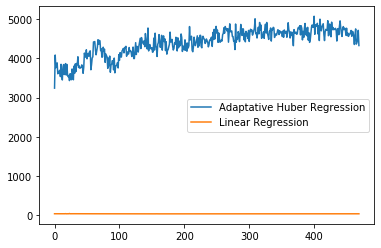

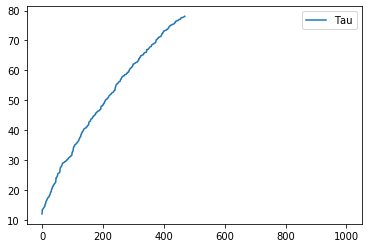

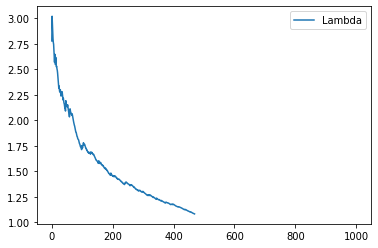

In [6]:
plt.plot(l2_error, label="Adaptative Huber Regression")
plt.plot(linear_l2_error, label="Linear Regression")
plt.legend()
plt.show()
plt.close()
plt.plot(taus, label="Tau")
plt.vlines(d, np.min(taus), np.min(taus))
plt.legend()
plt.show()
plt.close()
plt.plot(lambdas, label="Lambda")
plt.vlines(d, np.min(lambdas), np.min(lambdas))
plt.legend()
plt.show()
plt.close()

# Critique

- On ne fit plus $\tau$ et $\lambda$ mais on a toujours les hyper-paramètres $c_{\lambda}$ et $c_{\tau}$ à tuner.
- On ne retombe pas sur les résultats présentés dans le papier
- La variance du bruit n'est pas toujours finie, l'estimate proposé dans le papier n'est donc pas forcément très adapté